In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import cv2
import random

In [2]:
img_df = pd.read_csv("./train.csv")
img_df.head()

,ID,img_path,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,TRAIN_00000,./train/TRAIN_00000.jpg,8,1,16,12,5,10,14,2,13,4,7,3,6,9,11,15
1,TRAIN_00001,./train/TRAIN_00001.jpg,3,7,2,13,1,5,10,4,11,14,9,15,16,12,8,6
2,TRAIN_00002,./train/TRAIN_00002.jpg,9,12,11,14,6,16,10,13,15,8,3,1,4,5,2,7
3,TRAIN_00003,./train/TRAIN_00003.jpg,14,1,6,15,9,4,8,5,16,10,13,7,2,3,11,12
4,TRAIN_00004,./train/TRAIN_00004.jpg,3,15,12,4,16,13,11,10,9,6,14,5,1,8,2,7


In [3]:
img_path = img_df["img_path"][0]

image = cv2.imread(img_path)

image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [4]:
# 4*4로 자르기 위해 비율을 구하고 저장
img_w = image.width
img_h = image.height

w_rate = img_w/4
h_rate = img_h/4

# 자를 때 시작점을 지정해 줘야 하기에 0부터 시작
w_size_arr = [0]
h_size_arr = [0]

for i in range(1,5):
    w_size = i * w_rate
    h_size = i * h_rate

    w_size_arr.append(w_size)
    h_size_arr.append(h_size)

In [5]:
# 쪼갠 후 배열로 만들어 저장할때
count = 0
images = []
for i in range(len(w_size_arr)-1):
    for j in range(len(h_size_arr)-1):
        # 이미지를 4*4로 자르고 저장
        resize_img = image.crop((w_size_arr[j], h_size_arr[i], w_size_arr[j+1], h_size_arr[i+1]))
        # 이제 이미지를 배열로 만들고 배열을 저장한다.
        images.append(np.array(resize_img))

In [6]:
# 이미지 선따기
merged = Image.new('RGB', (img_w, img_h)) # "RGB" 대신 "L"이 들어가면 흑백이 된다.

cnt = 0
for i in range(len(w_size_arr)-1):
    for j in range(len(h_size_arr)-1):
        images[cnt] = cv2.cvtColor(images[cnt],cv2.COLOR_BGR2GRAY)
        im = Image.fromarray(images[cnt])
        cnt += 1
        merged.paste(im, (int(w_rate) * j, int(h_rate) * i))

# 4. 병합한 이미지 저장하기
# merged.save(f'./img2/{img_df["ID"][n]}.jpg')

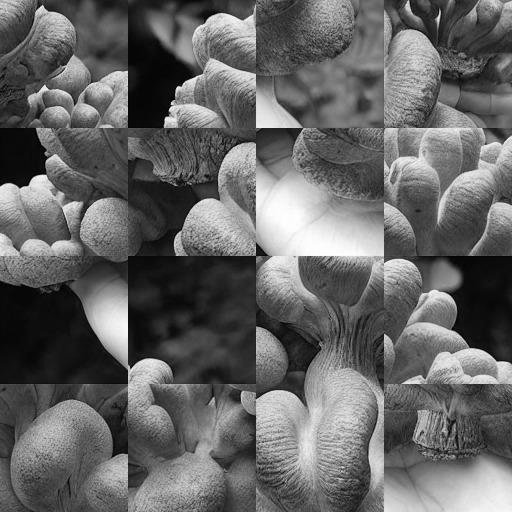

In [7]:
merged

In [8]:
images[1]

array([[64, 64, 61, ..., 52, 55, 50],
       [59, 58, 56, ..., 69, 68, 56],
       [51, 50, 48, ..., 80, 74, 67],
       ...,
       [ 4,  8,  8, ..., 70, 70, 71],
       [ 4,  8,  8, ..., 71, 71, 73],
       [ 4,  5,  5, ..., 73, 74, 74]], dtype=uint8)

In [9]:
images[7]

array([[ 59, 156, 197, ...,  90,  80,  66],
       [117, 187, 203, ...,  80,  73,  65],
       [150, 194, 197, ...,  85,  83,  82],
       ...,
       [ 75,  71,  72, ...,  79,  79,  88],
       [ 74,  70,  72, ...,  76,  74,  83],
       [ 77,  76,  78, ...,  78,  73,  83]], dtype=uint8)

In [10]:
images[11]

array([[ 64,  68,  68, ...,   5,   6,   6],
       [ 62,  80,  86, ...,  10,  10,  10],
       [ 93,  82,  65, ...,  10,  10,  10],
       ...,
       [ 82,  83,  84, ..., 192, 190, 197],
       [ 83,  79,  81, ..., 188, 188, 199],
       [ 88,  78,  82, ..., 197, 193, 200]], dtype=uint8)

In [11]:
images[9]

array([[  6,   7,   7, ...,  16,  16,  14],
       [  7,  11,  11, ...,  20,  20,  15],
       [  8,  11,  11, ...,  21,  21,  17],
       ...,
       [187, 168, 160, ...,  42,  42,  37],
       [180, 166, 185, ...,  41,  41,  35],
       [182, 179, 192, ...,  36,  36,  31]], dtype=uint8)

In [12]:
# 각 이미지의 꼭짓점이 일치하는지 확인하는 방식
for i in range(len(images)):
    for k in range(len(images)):
        main = images[i]
        compare = images[k]
        max_size = main.shape[0]-1
        
        up_score = 0
        down_score = 0
        r_score = 0
        l_score = 0
        score = (up_score + down_score + r_score + l_score)
        
        # (좌상, 우상), (좌하, 우하) = 위쪽변, 아랫쪽변
        if (main[0][0] == compare[0][max_size]) & (main[max_size][0] == compare[max_size][max_size]):
            up_score = 1            
        # (우상, 우하), (좌상, 좌하) = 오른쪽변, 왼쪽변
        if (main[max_size][0] == compare[0][0]) & (main[max_size][max_size] == compare[0][max_size]):
            r_score = 2
        # (좌하, 우하), (좌상, 우상) = 아랫쪽변, 윗쪽변
        if (main[0][max_size] == compare[0][0]) & (main[max_size][max_size] == compare[max_size][0]):
            down_score = 4
        # (좌상, 좌하), (우상, 우하) = 왼쪽변, 오른쪽변
        if (main[max_size][max_size] == compare[max_size][0]) & (main[0][max_size] == compare[max_size][max_size]):
            l_score = 8
        
        print(score)
        
        print("-"*80)
        
        if score == 6:
            print(count)
            print(score)
            print("-"*80)

0
--------------------------------------------------------------------------------
0
--------------------------------------------------------------------------------
0
--------------------------------------------------------------------------------
0
--------------------------------------------------------------------------------
0
--------------------------------------------------------------------------------
0
--------------------------------------------------------------------------------
0
--------------------------------------------------------------------------------
0
--------------------------------------------------------------------------------
0
--------------------------------------------------------------------------------
0
--------------------------------------------------------------------------------
0
--------------------------------------------------------------------------------
0
--------------------------------------------------------------------------------
0
--